In [47]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn import metrics

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
from sklearn.metrics import adjusted_rand_score

import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


german = pd.read_table("german.data", delimiter=' ', header=None)
german.columns = ['Status_Account', 'Duration', 'Credit_History', 'Purpose', 'Credit_Amount',
                     'Saving_Account', 'Present', 'Installment', 'Personal_Status', 'Other', 
                         'Residence', 'Property', 'Age', 'Other_Installment', 'Housing', 'Existing_Credits',
                             'Job', 'Liable_People', 'Tel', 'Foreign_Worker', 'Actual_Score']
germanOrigin = german
target = german.iloc[:,-1]   # Enregistrer la varialbe target
goodGerman = german[german['Actual_Score']==1]
badGerman = german[german['Actual_Score']==2]
german = german.iloc[:,0:-1]; # Enleveer la colonne target
german = german.drop(columns="Tel") # Enlever la colonne tel


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning:

read_table is deprecated, use read_csv instead.



In [48]:
germanOrigin.head()

,Status_Account,Duration,Credit_History,Purpose,Credit_Amount,Saving_Account,Present,Installment,Personal_Status,Other,...,Property,Age,Other_Installment,Housing,Existing_Credits,Job,Liable_People,Tel,Foreign_Worker,Actual_Score
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [49]:
germanOrigin['Installment'].unique()

array([4, 2, 3, 1], dtype=int64)

In [50]:
germanOrigin['Existing_Credits'].unique()

array([2, 1, 3, 4], dtype=int64)

In [51]:
germanOrigin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Status_Account       1000 non-null object
Duration             1000 non-null int64
Credit_History       1000 non-null object
Purpose              1000 non-null object
Credit_Amount        1000 non-null int64
Saving_Account       1000 non-null object
Present              1000 non-null object
Installment          1000 non-null int64
Personal_Status      1000 non-null object
Other                1000 non-null object
Residence            1000 non-null int64
Property             1000 non-null object
Age                  1000 non-null int64
Other_Installment    1000 non-null object
Housing              1000 non-null object
Existing_Credits     1000 non-null int64
Job                  1000 non-null object
Liable_People        1000 non-null int64
Tel                  1000 non-null object
Foreign_Worker       1000 non-null object
Actual_Score         1000 non-null int64
dtypes: int64(8), ob

In [52]:
def printBarPlot(germanOrigin,column):
    trace0 = go.Bar(
        x = germanOrigin[(germanOrigin["Actual_Score"]== 1)][column].value_counts().index.values,
        y = germanOrigin[(germanOrigin["Actual_Score"]== 1)][column].value_counts().values,
        name= column+' with Good credit'
    )

    #Second plot
    trace1 = go.Bar(
        x = germanOrigin[(germanOrigin["Actual_Score"]== 2)][column].value_counts().index.values,
        y = germanOrigin[(germanOrigin["Actual_Score"]== 2)][column].value_counts().values,
        name= column+" with Bad Credit"
    )

    data = [trace0, trace1]

    layout = go.Layout(
        title= column+' Distribuition'
    )


    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename=column)

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



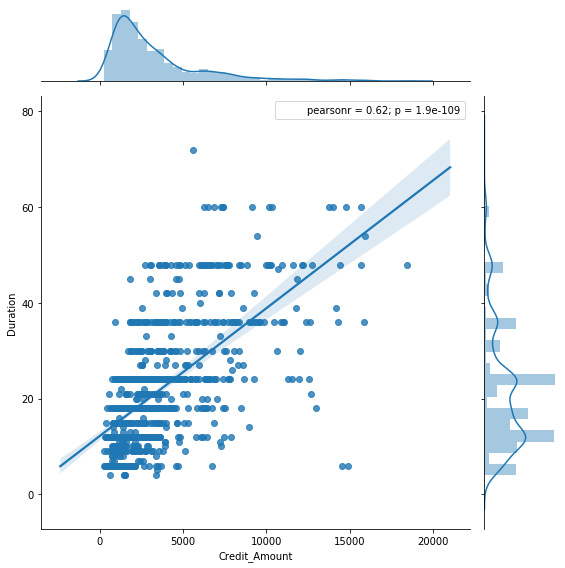

In [53]:
import scipy.stats as stats
r1 = sns.jointplot(x="Credit_Amount",y="Duration", data=german, kind="reg", height=8)
r1.annotate(stats.pearsonr)
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



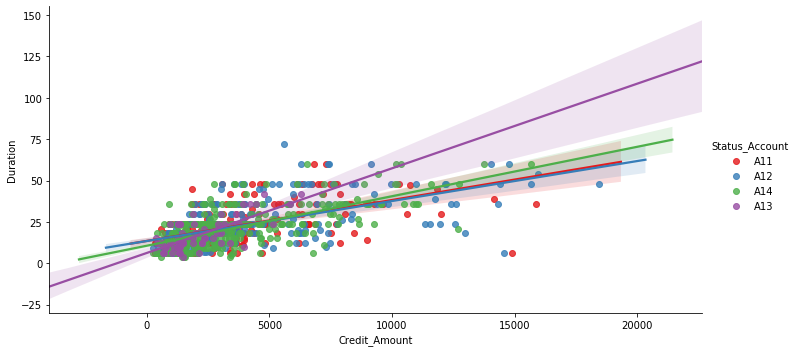

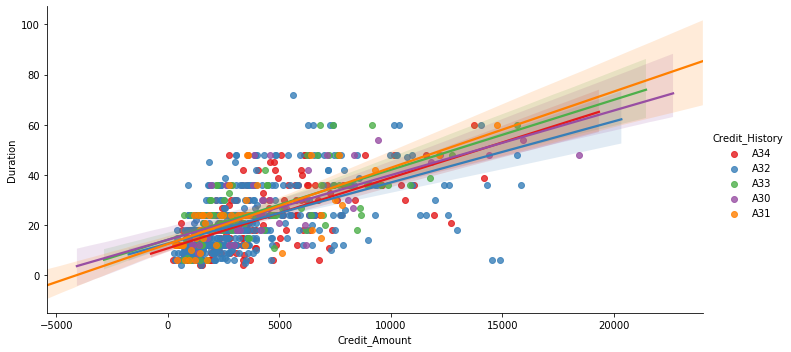

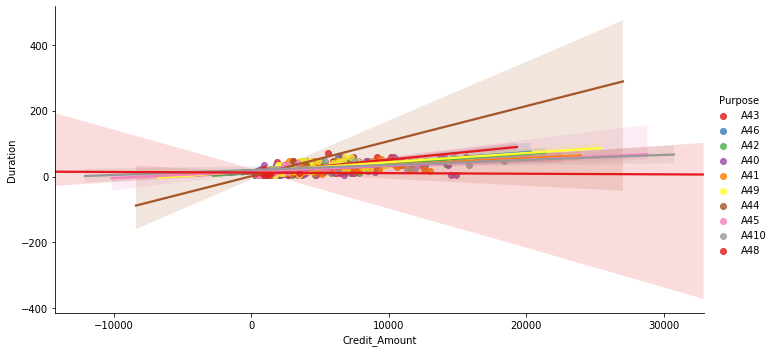

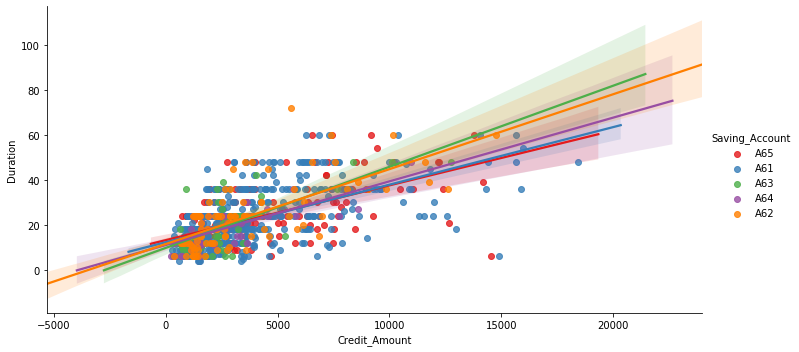

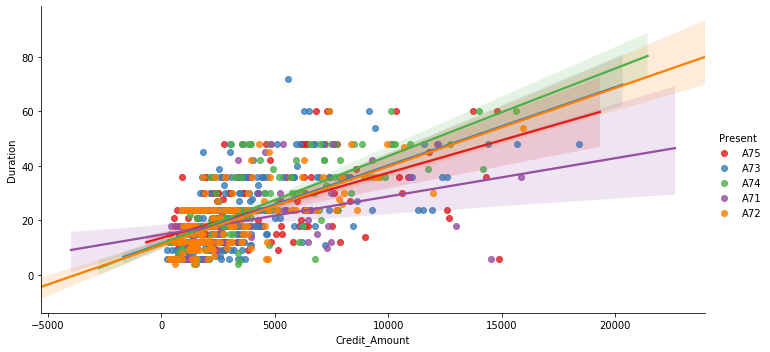

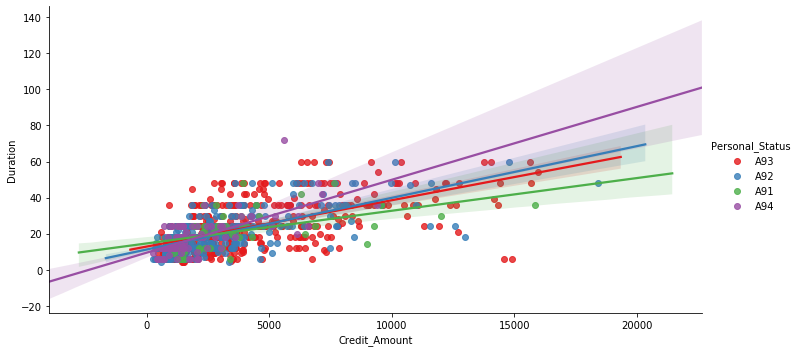

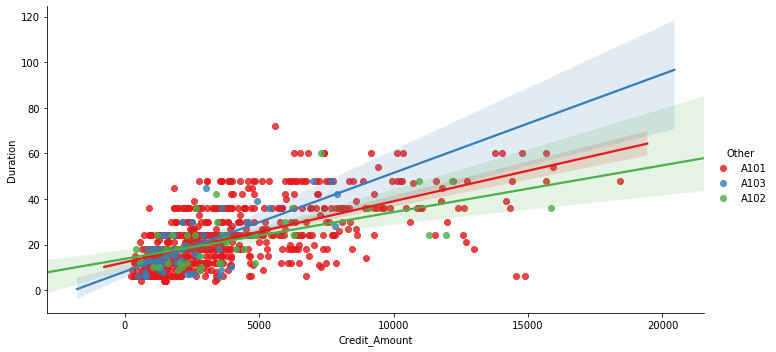

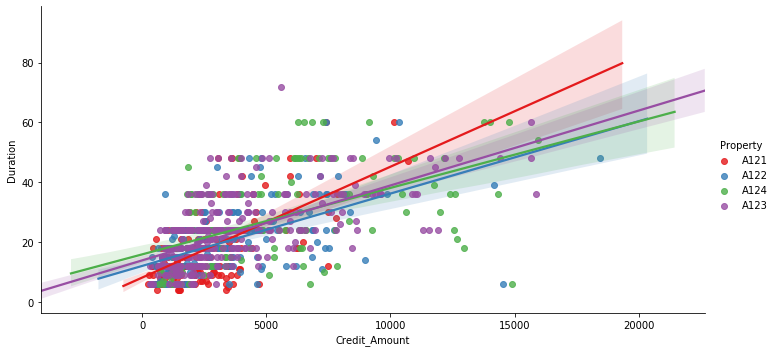

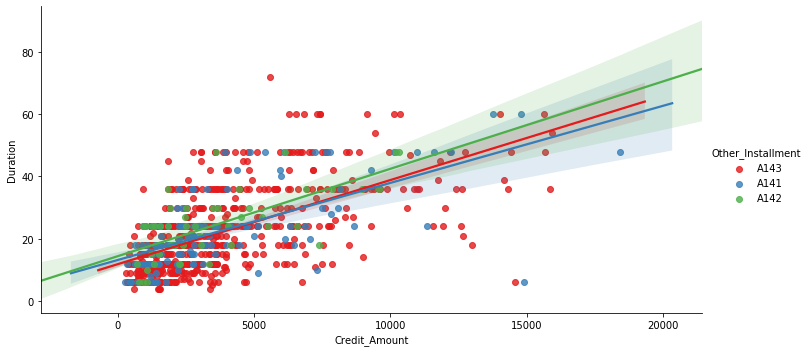

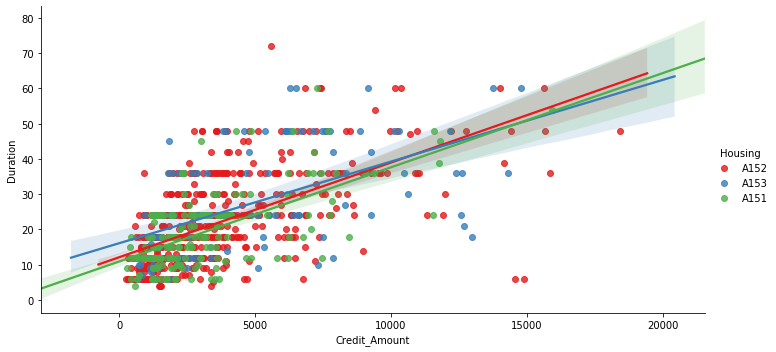

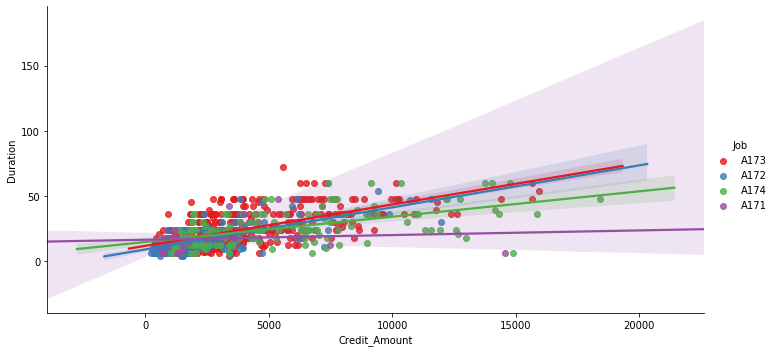

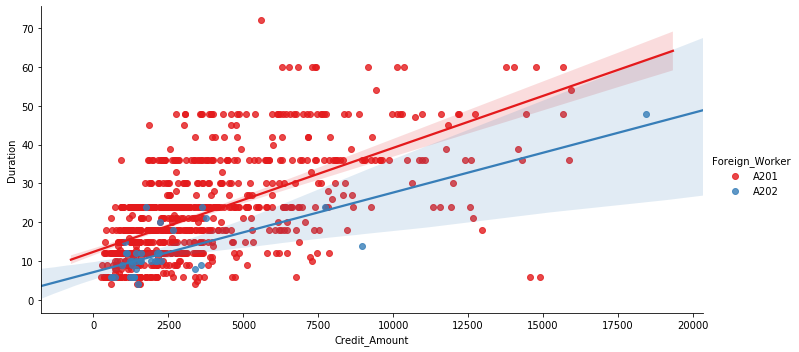

In [70]:
data_cat = germanOrigin.select_dtypes(include=['object'])
data_cat.drop("Tel", axis=1, inplace=True)
for i in data_cat.columns:
    sns.lmplot(x="Credit_Amount",y="Duration", hue=i, data=german, palette="Set1", aspect=2)
    plt.show()

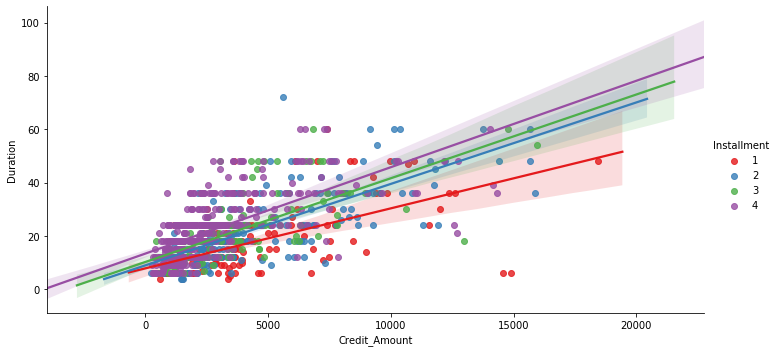

In [55]:
sns.lmplot(x="Credit_Amount",y="Duration", hue='Installment', data=germanOrigin, palette="Set1", aspect=2)
plt.show()

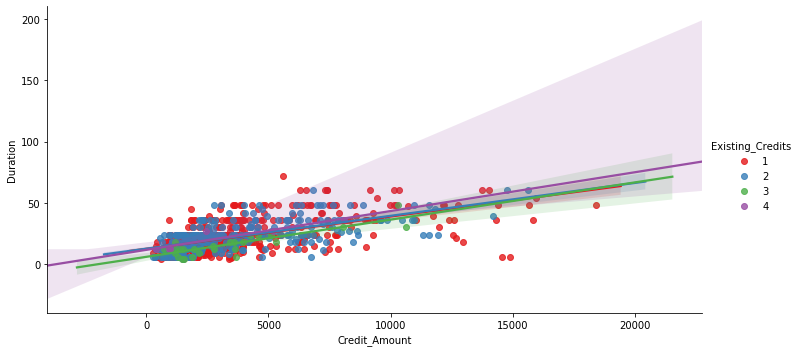

In [56]:
sns.lmplot(x="Credit_Amount",y="Duration", hue='Existing_Credits', data=germanOrigin, palette="Set1", aspect=2)
plt.show()

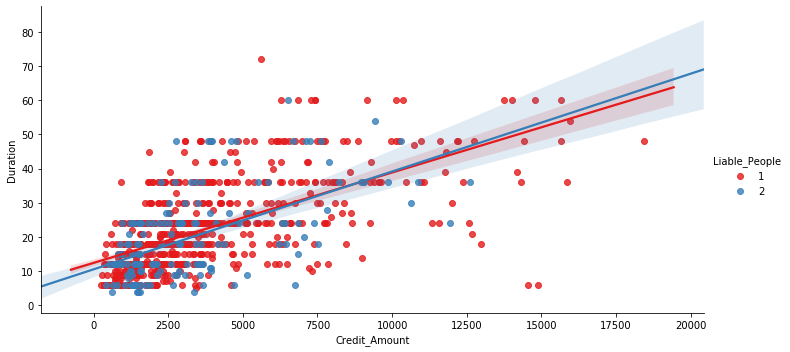

In [57]:
sns.lmplot(x="Credit_Amount",y="Duration", hue='Liable_People', data=germanOrigin, palette="Set1", aspect=2)
plt.show()

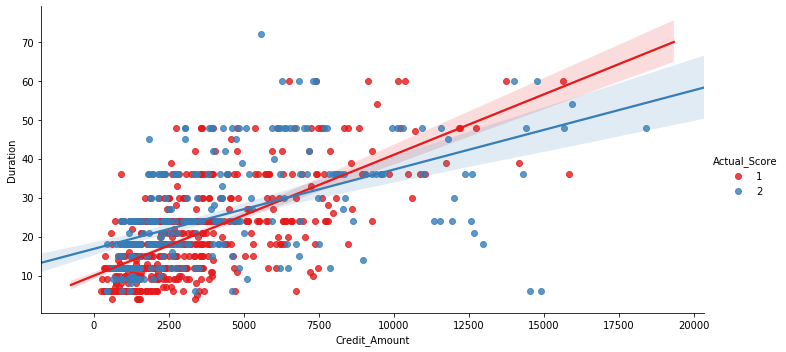

In [58]:
sns.lmplot(x="Credit_Amount",y="Duration", hue='Actual_Score', data=germanOrigin, palette="Set1", aspect=2)
plt.show()

In [71]:
cols = []
data_num = germanOrigin._get_numeric_data()
for i in data_num:
    cols.append(i)
for col in cols:
    qmn = data_num[col].quantile(q=0.1)
    qmx = data_num[col].quantile(q=0.9)
    data_num[col] = data_num[col].apply(lambda x : qmn if x < qmn else (qmx if x > qmx else x))

In [73]:
data_num = pd.concat([data_num, target])

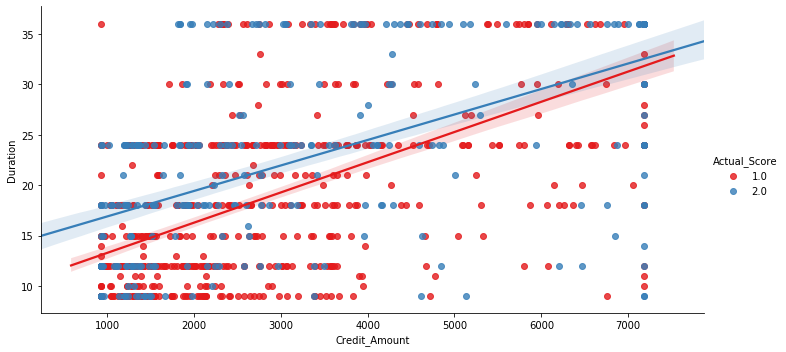

In [74]:
sns.lmplot(x="Credit_Amount",y="Duration", hue='Actual_Score', data=data_num, palette="Set1", aspect=2)
plt.show()